### Information

In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# Flipping a coin (non biased) 100 times
rand_coins = np.random.binomial(1, 0.5, 100)

rand_coins

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0])

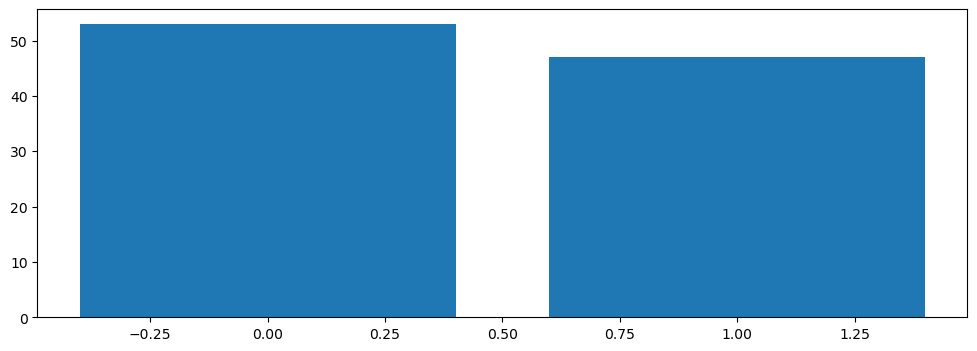

In [35]:
# Create an empty plot

fig, ax = plt.subplots(figsize=(12, 4))

x, counts = np.unique(rand_coins, return_counts=True)

ax.bar(x, counts);



In [36]:
x, counts

(array([0, 1]), array([53, 47]))

### Bernoulli Distribution

In [37]:
# The Bernoulli distribution is just the binomial with the first parameter as 1
# Remember binomial can be used for multiple coins as such by setting the first parameter

def bernoulli(p, size=None):
    return np.random.binomial(1, p, size)


In [38]:
bernoulli(0.5)

1

In [39]:
# Flipping an unfair coin

rand_coins = bernoulli(0.7, 100)

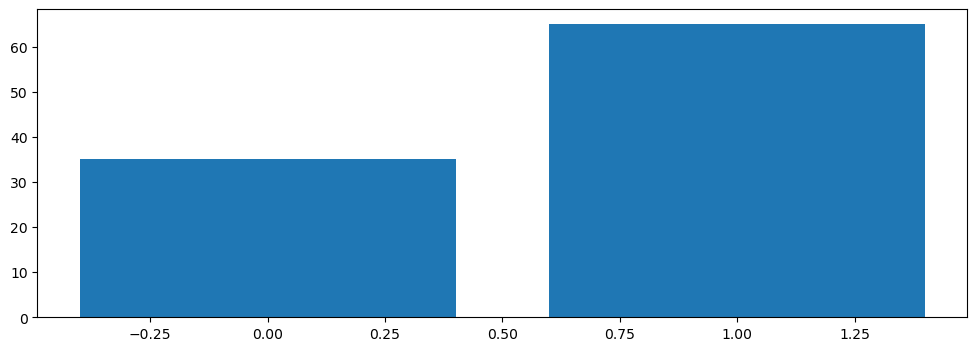

In [40]:
# Create a plot for the bernoulli

fig, ax = plt.subplots(figsize=(12, 4))

x, counts = np.unique(rand_coins, return_counts=True)

ax.bar(x, counts);

In [41]:
# Flipping two coins once each
rand_coins = np.random.binomial(2, .5)

rand_coins

# Will give the number of times heads (assuming heads is a successful trial) comes up

1

In [67]:
# Flipping two 100000 times to show the results - not .333 % chance of each outcome (2xheads, 1xheads, 0xheads)
rand_coins = np.random.binomial(2, .5, 20000)

rand_coins

array([2, 1, 2, ..., 1, 2, 2])

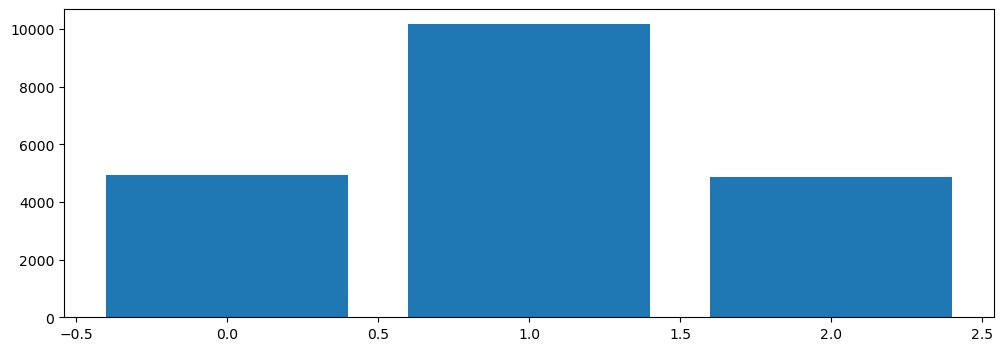

In [68]:
fig, ax = plt.subplots(figsize=(12, 4))

x, counts = np.unique(rand_coins, return_counts=True)

ax.bar(x, counts);

In [70]:
x, counts

(array([0, 1, 2]), array([ 4953, 10177,  4870]))

**Explanation**

Possibilities = HH, HT, TH, TT (so HT = TH = 50% chance)



**Dice Rolls**



In [44]:
# Default random number generator
rng = np.random.default_rng()

In [45]:
# Roll a single Dice

rng.integers(1, 7)

1

In [46]:
# Roll a single Dice
single_rolls = rng.integers(1, 7, 100000)

In [47]:
# Count the unique values

x, counts = np.unique(single_rolls, return_counts=True)

x, counts

(array([1, 2, 3, 4, 5, 6]), array([16661, 16645, 16754, 16644, 16745, 16551]))

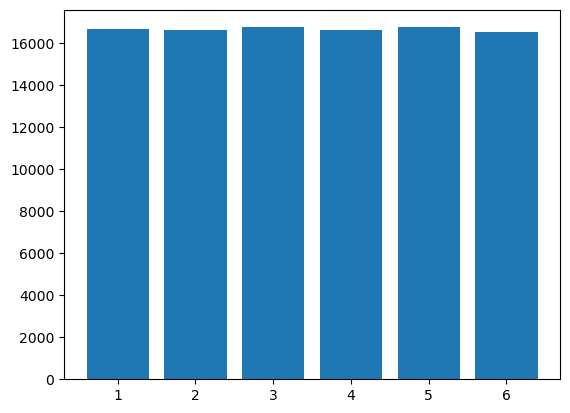

In [48]:
# Create a plot

fig, ax = plt.subplots()

ax.bar(x, counts);

In [49]:
# Roll two dice

double_rolls = rng.integers(1, 7, (100000, 2))

double_rolls

array([[2, 4],
       [5, 5],
       [3, 5],
       ...,
       [1, 6],
       [5, 1],
       [2, 6]])

In [50]:
# Sum the two dice

sum_double_rolls = double_rolls.sum(axis=1) #axis0 would sum the columns, axis1 sums by row

sum_double_rolls


array([ 6, 10,  8, ...,  7,  6,  8])

In [51]:
# Count the unique values

x, counts = np.unique(sum_double_rolls, return_counts=True)

x, counts

(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([ 2775,  5390,  8392, 11051, 13858, 16584, 13985, 11234,  8285,
         5629,  2817]))

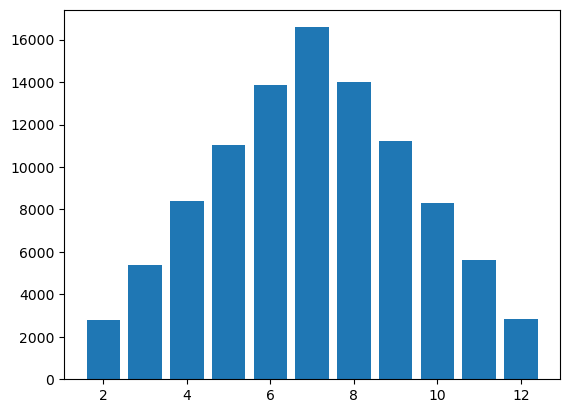

In [52]:
# Create a plot

fig, ax = plt.subplots()

ax.bar(x, counts);

In [53]:
# Plotting the individual rolls together to show how each roll is combined

individual_double_rolls = double_rolls[:,0] * 10 + double_rolls[:,1]

individual_double_rolls

array([24, 55, 35, ..., 16, 51, 26])

In [54]:
# Count the unique values

x, counts = np.unique(individual_double_rolls, return_counts=True)

x, counts

(array([11, 12, 13, 14, 15, 16, 21, 22, 23, 24, 25, 26, 31, 32, 33, 34, 35,
        36, 41, 42, 43, 44, 45, 46, 51, 52, 53, 54, 55, 56, 61, 62, 63, 64,
        65, 66]),
 array([2775, 2735, 2811, 2768, 2747, 2781, 2655, 2840, 2798, 2774, 2712,
        2845, 2741, 2702, 2744, 2723, 2706, 2940, 2783, 2820, 2860, 2780,
        2719, 2785, 2773, 2765, 2823, 2745, 2730, 2877, 2743, 2831, 2830,
        2770, 2752, 2817]))

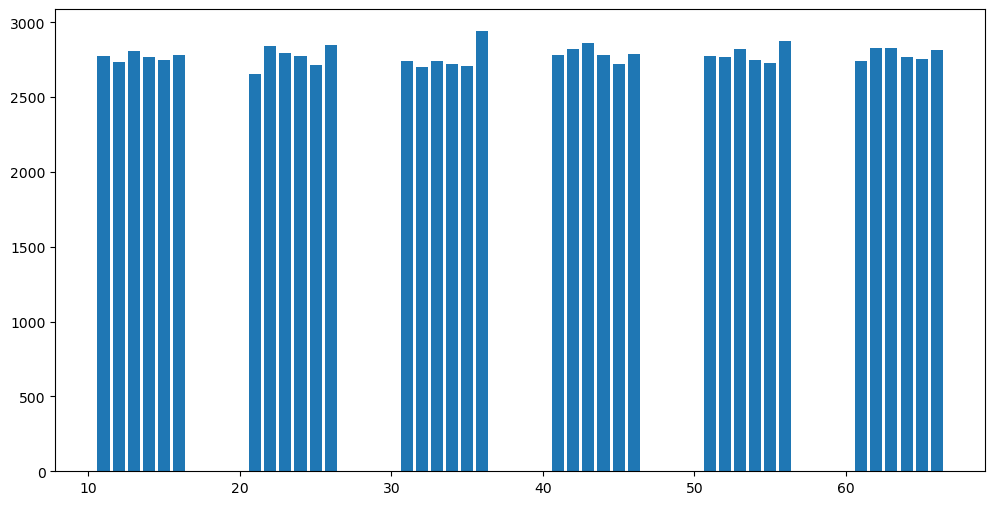

In [55]:
# Create a plot to show the breakdown of each roll

fig, ax = plt.subplots(figsize=(12,6))

ax.bar(x, counts);

The first group is the 1,1 1,2 1,3 1,4 1,5 1,6 
Second group is 2,1 2,2 2,3 2,4 2,5 2,6 
etc...

In [56]:
# Entropy

def H(p):
    return -(1 - p) * np.log2(1.0 - p) - p * np.log2(p)



In [57]:
# Entropy of 0.5

H(0.25)

0.8112781244591328

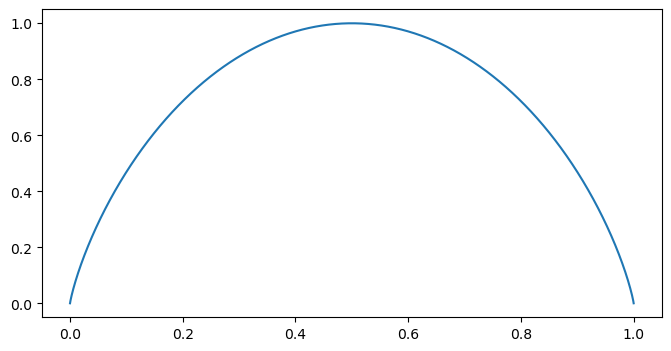

In [58]:
# Plotting Entropy

fig, ax = plt.subplots(figsize= (8,4))

# p is a probability

p = np.linspace(0.000001, 0.999999, 10001)



ax.plot(p, H(p));

In [59]:
rand_coins = np.random.binomial(2, .5, 100000)

rand_coins

array([2, 1, 1, ..., 1, 1, 1])